In [2]:
import control as ct
from control.matlab import *

In [3]:
P = ct.tf([2.5, 0, 1, 0], [1, 0, 4.25, 0, 1], name="P"); print(P)

<TransferFunction>: P
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   2.5 s^3 + s
------------------
s^4 + 4.25 s^2 + 1



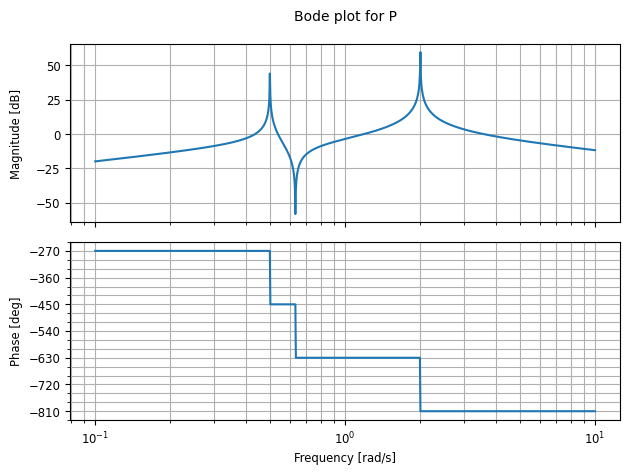

In [4]:
ct.bode(P)

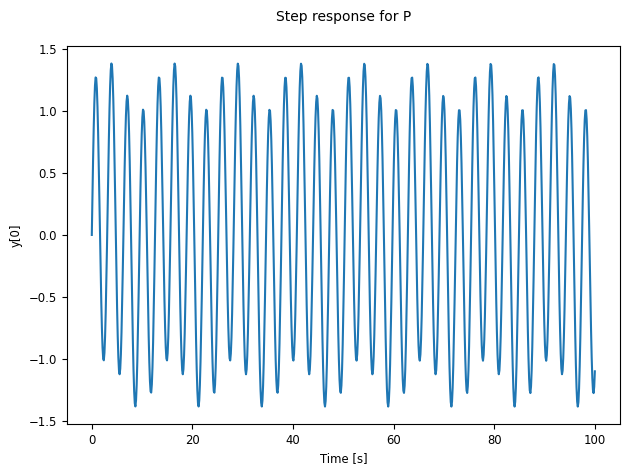

In [45]:
ct.step_response(P, T=100).plot()

In [31]:
Gyd = ct.feedback(P, 1, sign=-1, name="Gyd"); print(Gyd)

<TransferFunction>: Gyd
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


          2.5 s^3 + s
--------------------------------
s^4 + 2.5 s^3 + 4.25 s^2 + s + 1



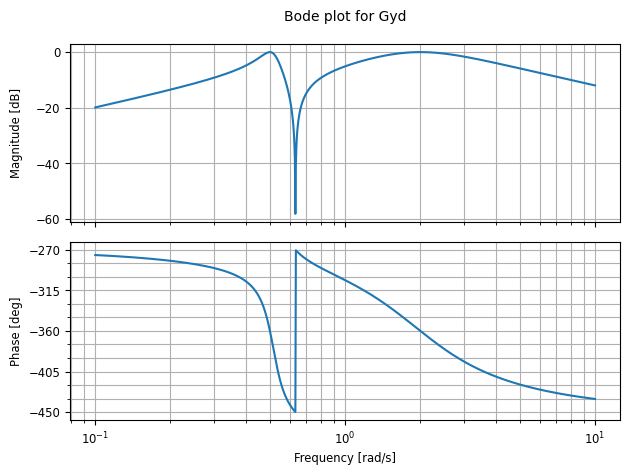

In [19]:
ct.bode(Gyd)

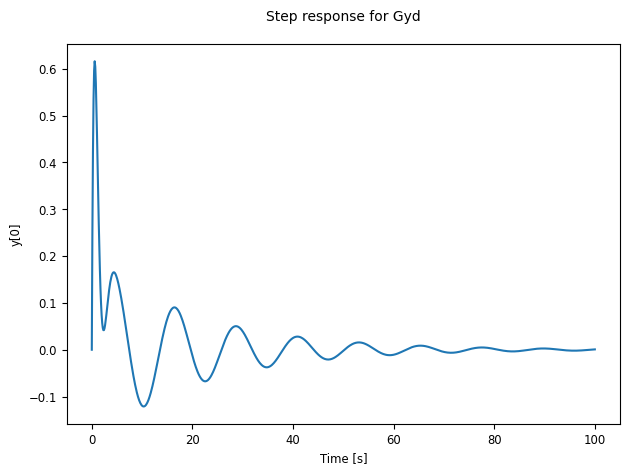

In [49]:
ct.step_response(Gyd,T=100).plot()

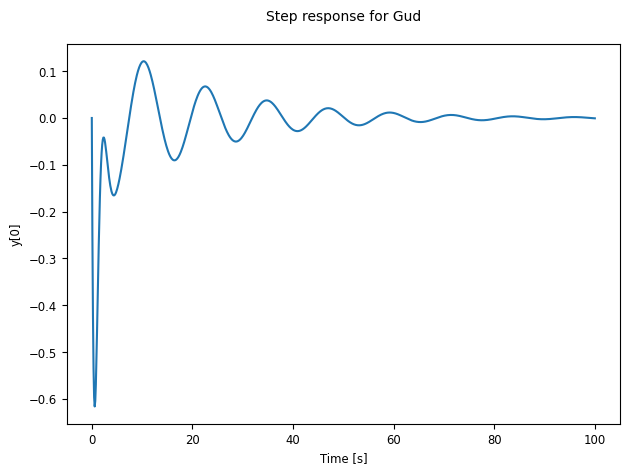

In [52]:
Gud = ct.series(-1, Gyd, name="Gud"); ct.step_response(Gud, T=100).plot()

In [69]:
K1 = ct.tf([1,5], [1, 0], name="K1"); GydK1 = ct.feedback(P, K1, sign=-1, name="GydK1"); print(GydK1)

<TransferFunction>: GydK1
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


            2.5 s^4 + s^2
-------------------------------------
s^5 + 2.5 s^4 + 16.75 s^3 + s^2 + 6 s



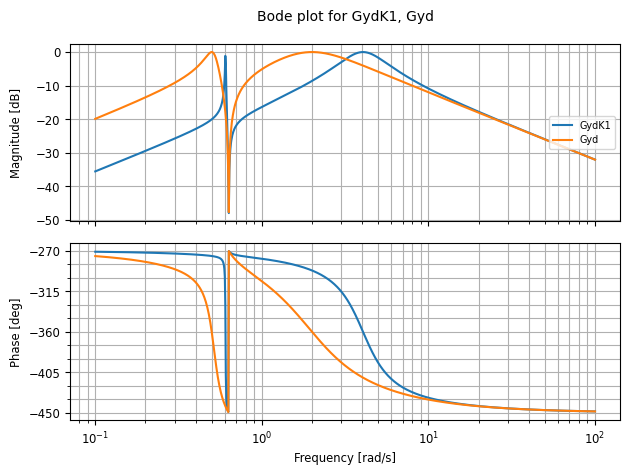

In [71]:
ct.bode([GydK1, Gyd])

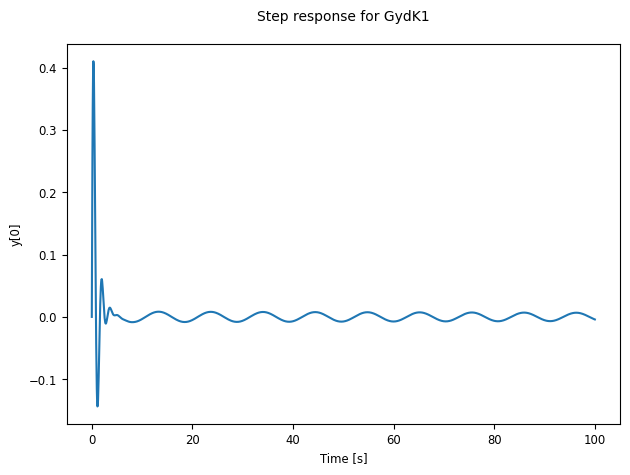

In [72]:
ct.step_response(GydK1, T=100).plot()

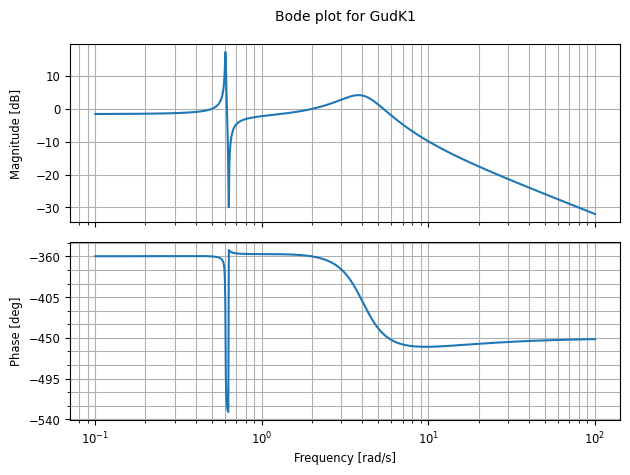

In [73]:
GudK1 = ct.feedback(ct.series(P, K1), 1, sign=-1, name="GudK1"); ct.bode(GudK1)

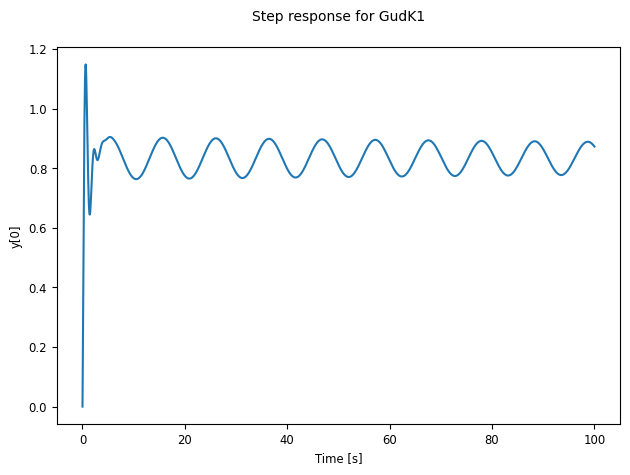

In [74]:
ct.step_response(GudK1, T=100).plot()

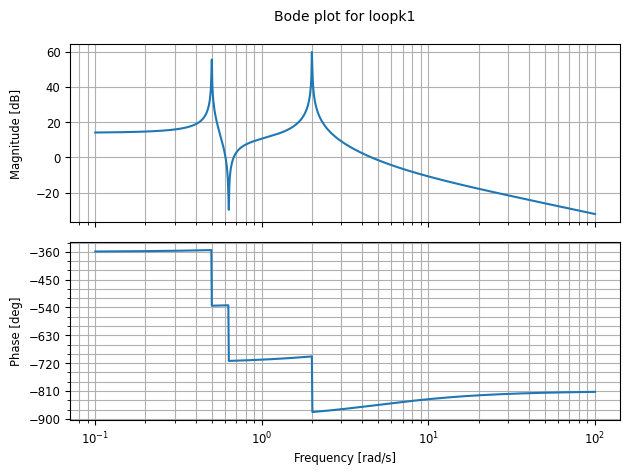

In [75]:
loopk1 = ct.series(P, K1, name="loopk1"); ct.bode(loopk1)